<a href="https://colab.research.google.com/github/UKashNK/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: **PREDICTION OF PRODUCT SALES**

- Author: Katende Ukasha Ndugwa

##Project Overview

##Load and Inspect Data

In [2]:
#importing necessary modules
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
path = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Cleaning the Data

### Inspecting the data

In [3]:
df.shape

(8523, 12)

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
no_weight = df['Item_Weight'].isna()
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [9]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [11]:
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [12]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(["low fat","LF"],"Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","Low Fat")
df["Item_Fat_Content"].value_counts()

Low Fat    5634
Regular    2889
Name: Item_Fat_Content, dtype: int64

In [14]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
for col in num_cols:
  minimum = df[col].min()
  maximum = df[col].max().round(4)
  mean = df[col].mean().round(4)
  print(f"The Summary statistics for {col} are: \nminimum:{minimum}\nmaximum:{maximum}\nmean:{mean}\n ")

The Summary statistics for Item_Weight are: 
minimum:-1.0
maximum:21.35
mean:10.4789
 
The Summary statistics for Item_Visibility are: 
minimum:0.0
maximum:0.3284
mean:0.0661
 
The Summary statistics for Item_MRP are: 
minimum:31.29
maximum:266.8884
mean:140.9928
 
The Summary statistics for Outlet_Establishment_Year are: 
minimum:1985
maximum:2009
mean:1997.8319
 
The Summary statistics for Item_Outlet_Sales are: 
minimum:33.29
maximum:13086.9648
mean:2181.2889
 


##Exploratory Data Analysis

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Histograms to view the distributions of numerical features**

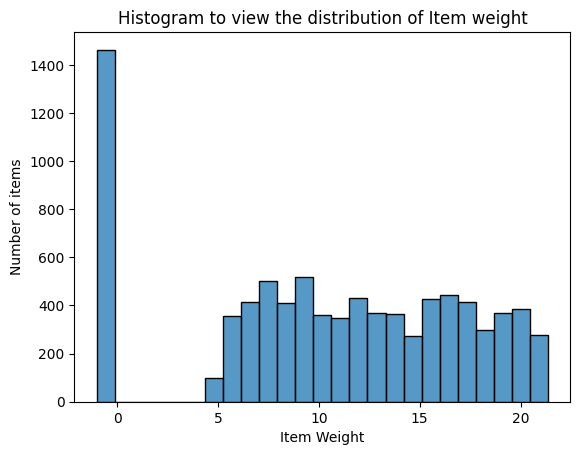

In [17]:
#Investigating Item weight
ax = sns.histplot(data=df, x="Item_Weight")
ax.set(title="Histogram to view the distribution of Item weight",ylabel="Number of items",xlabel="Item Weight");

The large bar below zero is due placeholder value -1 in the data

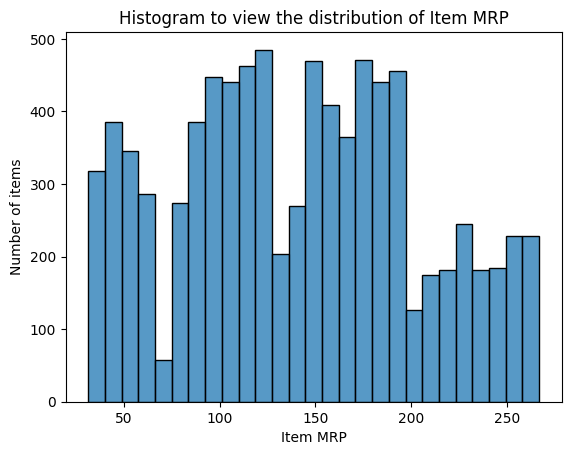

In [18]:
#Investigating Item MRP
ax = sns.histplot(data=df, x="Item_MRP")
ax.set(title="Histogram to view the distribution of Item MRP",ylabel="Number of items",xlabel="Item MRP");

**Boxplots to view statistical summaries of numerical features**

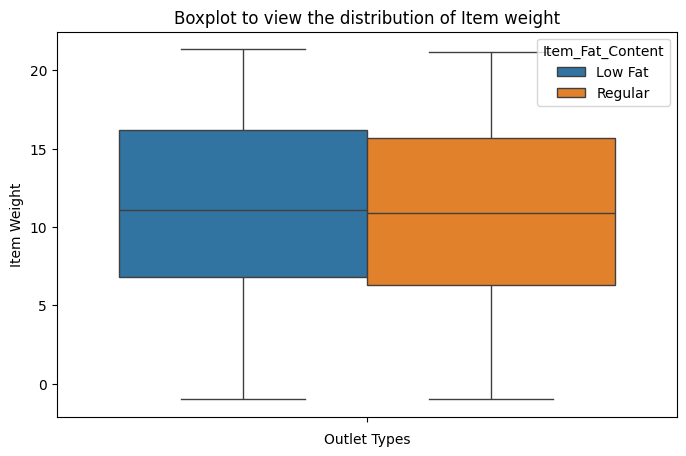

In [19]:
#Investigating Item Weight
fig,ax =plt.subplots(figsize=(8,5))
sns.boxplot(data=df, y="Item_Weight",hue="Item_Fat_Content",ax=ax)
ax.set(title="Boxplot to view the distribution of Item weight",xlabel="Outlet Types",ylabel="Item Weight");

The median weight of the items sold is just above 10 for both regular and low fat items

**Countplots to view the frequency of each class of categorial features**

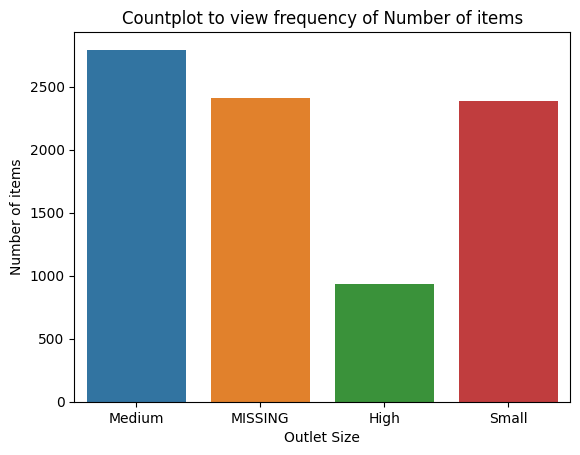

In [20]:
#Investigating Outlet size and items sold
ax = sns.countplot(data=df, x="Outlet_Size",hue="Outlet_Size")
ax.set(title="Countplot to view frequency of Number of items",ylabel="Number of items",xlabel="Outlet Size");

The medium outlet size sells the most items.
The High outlet size sells the least items.


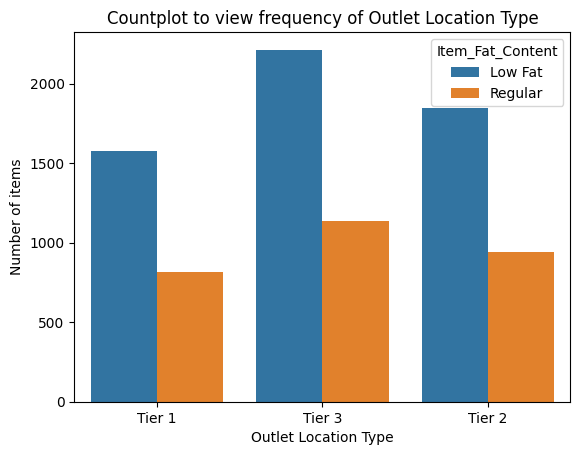

In [21]:
#Investigating Outlet location type and items sold
ax = sns.countplot(data=df, x="Outlet_Location_Type",hue="Item_Fat_Content")
ax.set(title="Countplot to view frequency of Outlet Location Type",ylabel="Number of items",xlabel="Outlet Location Type");

Low fat items sell better tha regular fat items in all Outlet location types

**Heatmap to view the correlation between features**

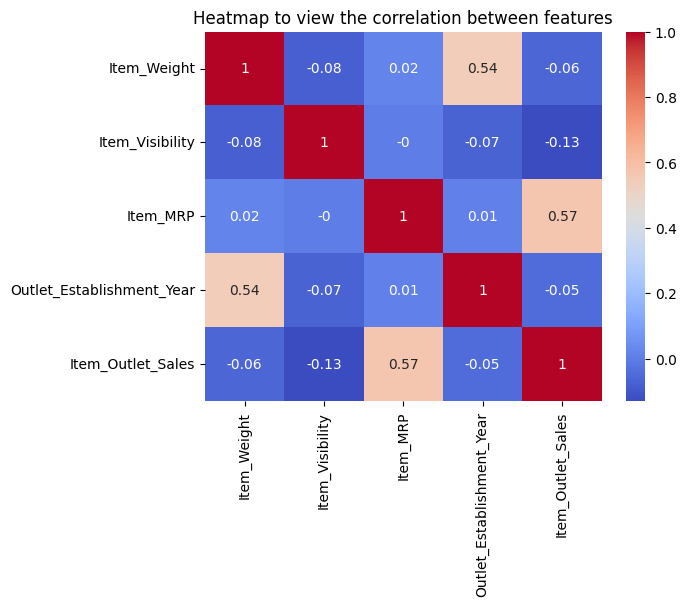

In [22]:
#calculating correlations
corr = df.corr(numeric_only=True).round(2)

#Drawing Heatmap
ax = sns.heatmap(corr,cmap="coolwarm",annot=True)
ax.set(title="Heatmap to view the correlation between features");

- There is a moderate positive correlation betweeen Item MRP and Item Outlet Sales
- There is a moderate positive correlation betweeen Item Weight and Outlet Establishment Year

##Feature Inspection

###Removing Placeholders

In [23]:
#Removing placeHolders
df["Item_Weight"].replace(-1,np.nan,inplace=True)
df["Outlet_Size"].replace("MISSING",np.nan,inplace=True)

In [24]:
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

###Defining functions

In [26]:
#Univariate function
def univ_viz(dataf,col,figsize=(10,6)):

  if dataf[col].dtype == "float64":
    #Drawing plot for numeric type feature
    fig, ax = plt.subplots(constrained_layout=True,figsize=figsize)
    ax = sns.histplot(df,x=col,ax=ax)
    ax.set(title=f"Univariate visualization showing the distribution of {col}.",xlabel=col,ylabel="Number of items");

  else:
    #Drawing plot for categorical type feature
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.countplot(dataf,x=col,ax=ax)
    ax.set(title=f"Univariate visualization showing the distribution of {col}.",xlabel=col,ylabel="Number of items");
    if col== "Item_Type":
      ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right');
    plt.tight_layout();


#Multivariate function
def multi_viz(dataf,col,target="Item_Outlet_Sales",figsize=(10,6)):
  if dataf[col].dtype == "float64":
    #Calculating correlation
    corr = df[[col,target]].corr().round(2)
    r = str(corr.loc[col,target])

    #Drawing plot for numeric type feature
    fig, ax = plt.subplots(constrained_layout=True,figsize=figsize)

    line_kws={"color":"red","label":f"Correlation:{r}"}
    scatter_kws={"edgecolor":"orange"}

    sns.regplot(data=df, x=col, y=target, ax=ax, scatter_kws=scatter_kws,line_kws=line_kws);
    ax.set(title=f"Multivariate visualization plotting {col} vs. {target}.",xlabel=col,ylabel=target);
    ax.legend();

  else:
    #Drawing plot for categorical type feature
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxenplot(data=df, x=col, y=target, ax=ax);
    sns.stripplot(data=df, x=col, y=target, ax=ax,size=3,alpha=0.8,hue=col);
    ax.set(title=f"Multivariate visualization plotting {col} vs. {target}.",xlabel=col,ylabel=target);
    if col== "Item_Type":
      ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right');
    plt.tight_layout();


###Item weight

Weight of the product


####Univariate Visualisation

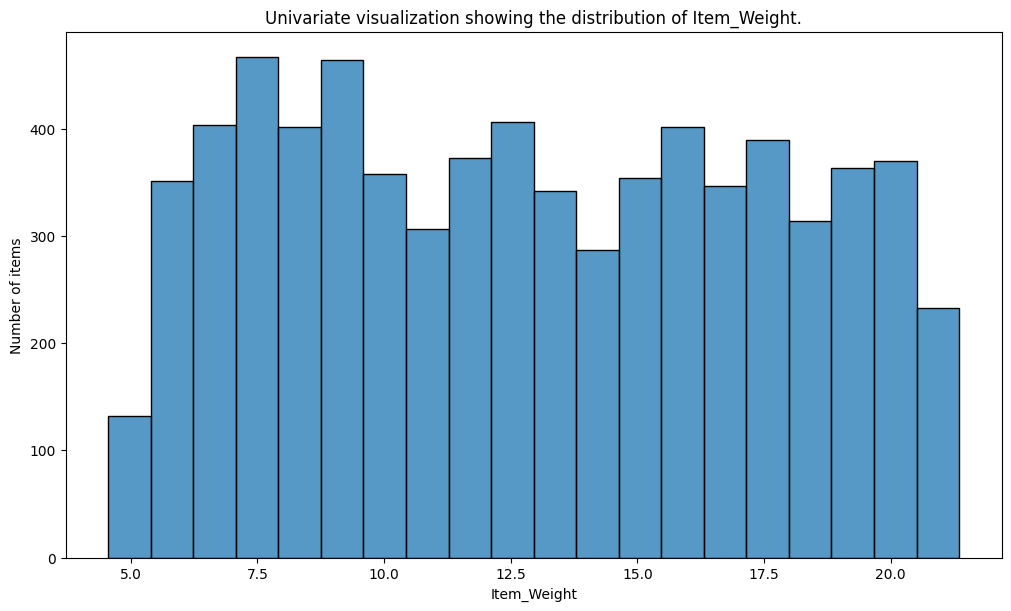

In [27]:
univ_viz(df,"Item_Weight")

Type of feature: Numerical

Null values: 1463

Constant or Quasi-constant: No

Cardinality : Very High(>10)

would we know this feature: Yes

Business case Scenario : Yes, Seller cannot control weight of items since they dont make them

####Multivariate Visualisation

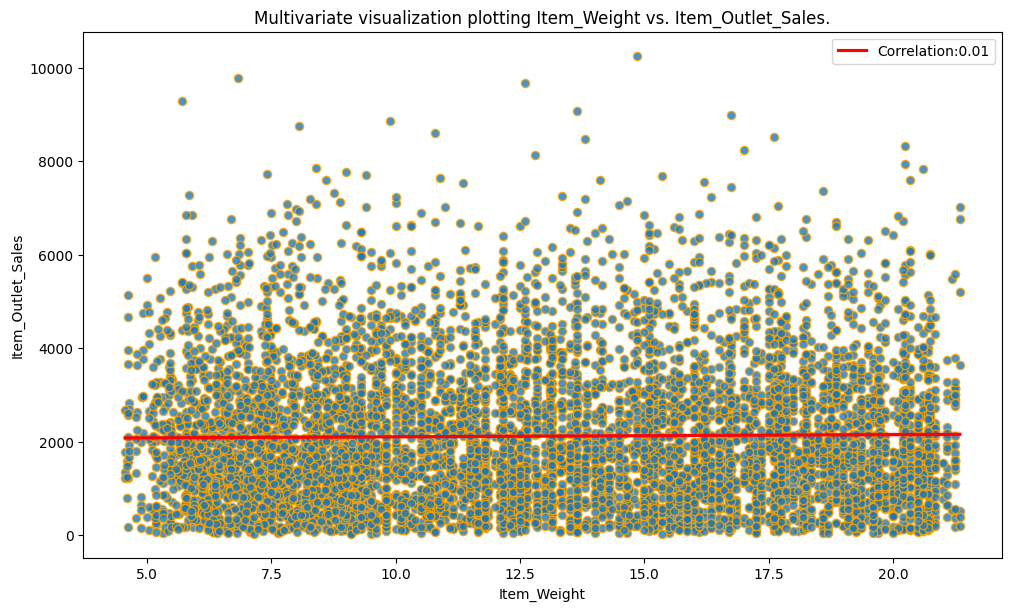

In [28]:
multi_viz(df,"Item_Weight")

- Yes, I expect weight to affect sales.

- No, weight does not appear to predict sales.

###Item Fat Content

Whether the product is low-fat or regular


####Univariate Visualisation

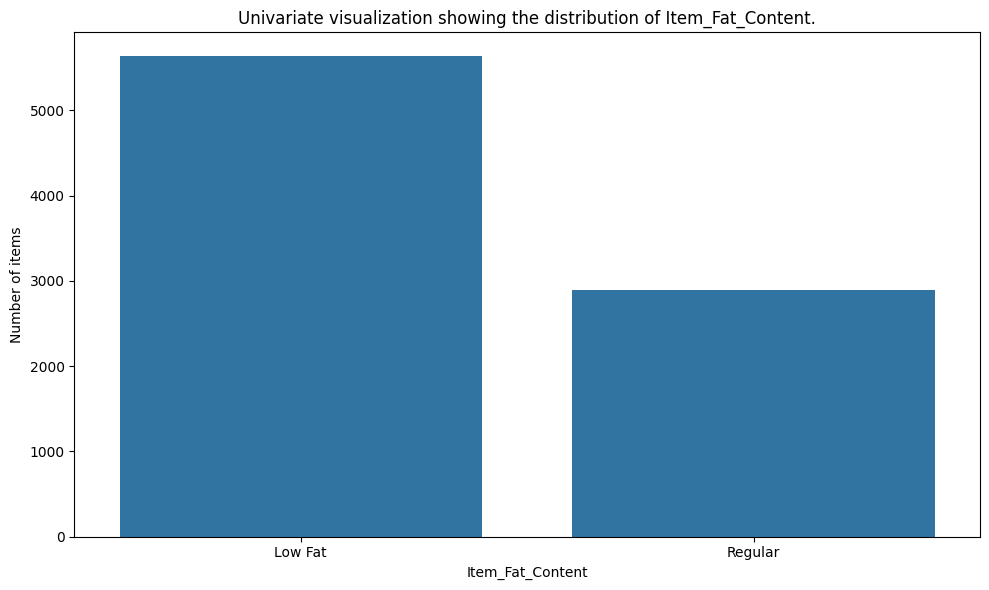

In [29]:
univ_viz(df,"Item_Fat_Content")

Type of feature: nominal

Null values: 0

Constant or Quasi-constant: No

Cardinality : Low(2)

would we know this feature: Yes

Business case Scenario : No, Seller can control items they stock

####Multivariate Visualisation

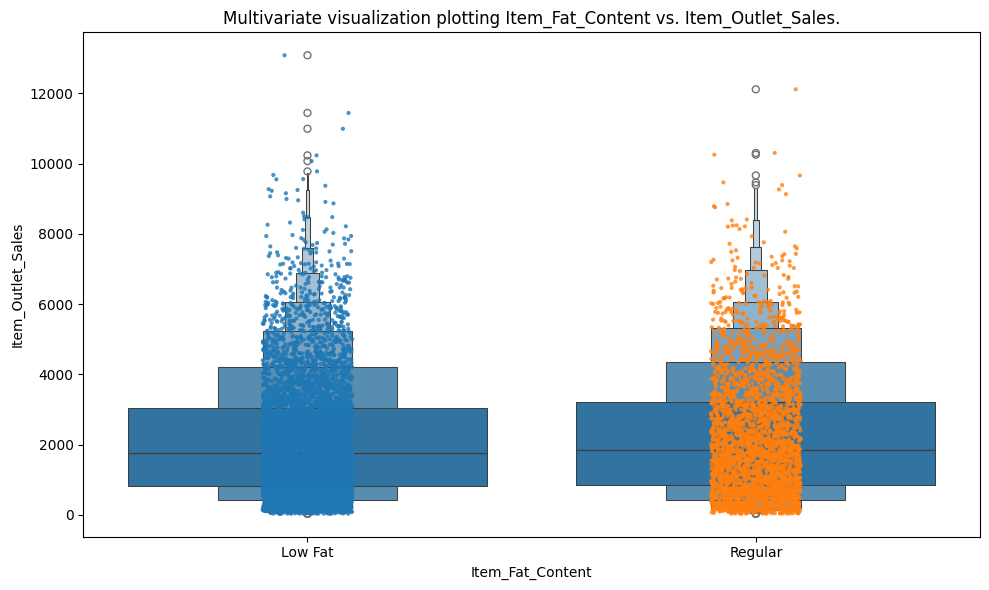

In [30]:
multi_viz(df,"Item_Fat_Content")

- Yes, I expect Fat Content to affect sales.

- No, Fat content appears not to predict sales.

###Item Visibility

The percentage of total display area of all products in a store allocated to the particular product


####Univariate Visualisation

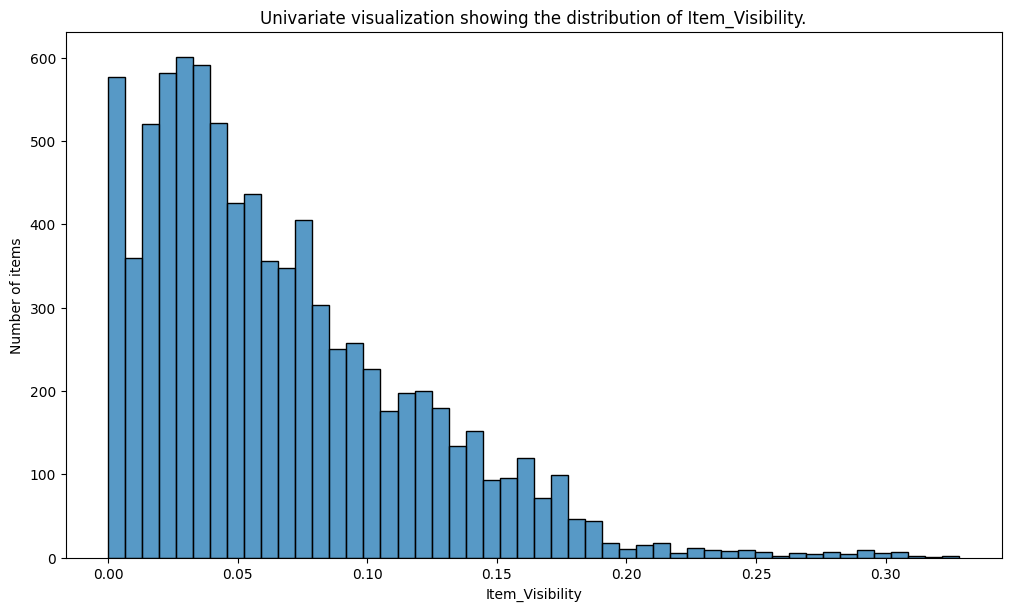

In [31]:
univ_viz(df,"Item_Visibility")

Type of feature: Numerical

Null values: 0

Constant or Quasi-constant: No

Cardinality : Very High(>10)

would we know this feature: Yes

Business case Scenario : No

####Multivariate Visualisation

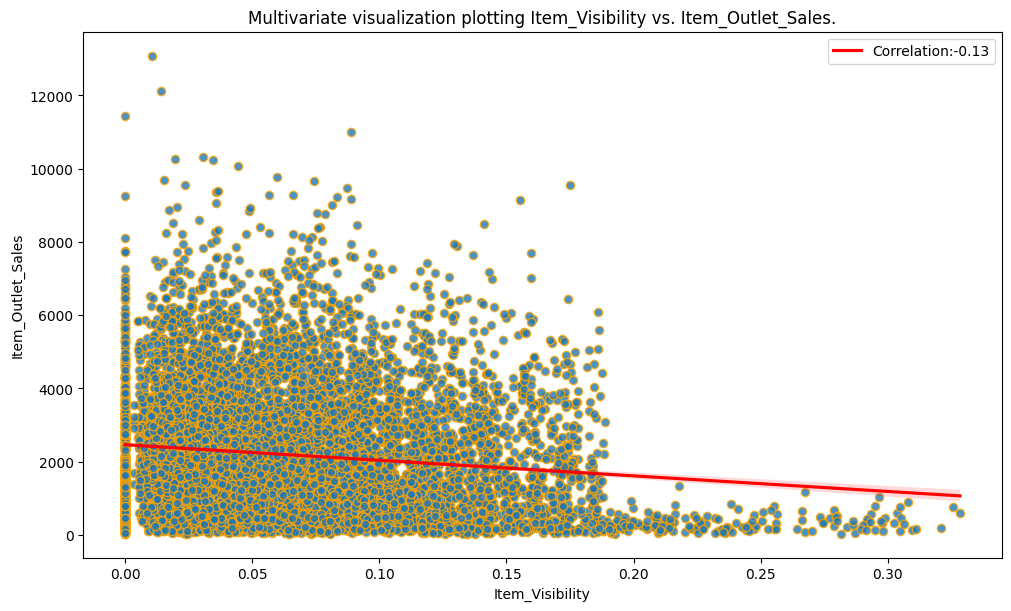

In [32]:
multi_viz(df,"Item_Visibility")

- Yes, I expect Visibility to affect sales.

- Yes, Visibility appears to predict sales.

###Item Type

The category to which the product belongs


####Univariate Visualisation

<ipython-input-26-a7077653fd91>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right');


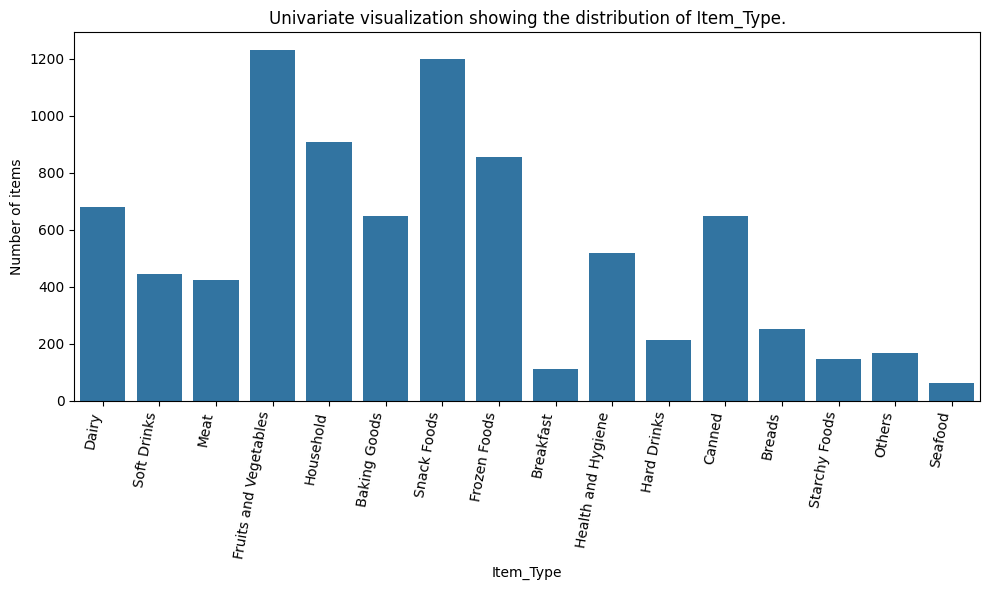

In [33]:
univ_viz(df,"Item_Type")

Type of feature: Nominal

Null values: 0

Constant or Quasi-constant: No

Cardinality : high(16)

would we know this feature: Yes

Business case Scenario : No

####Multivariate Visualisation

<ipython-input-26-a7077653fd91>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right');


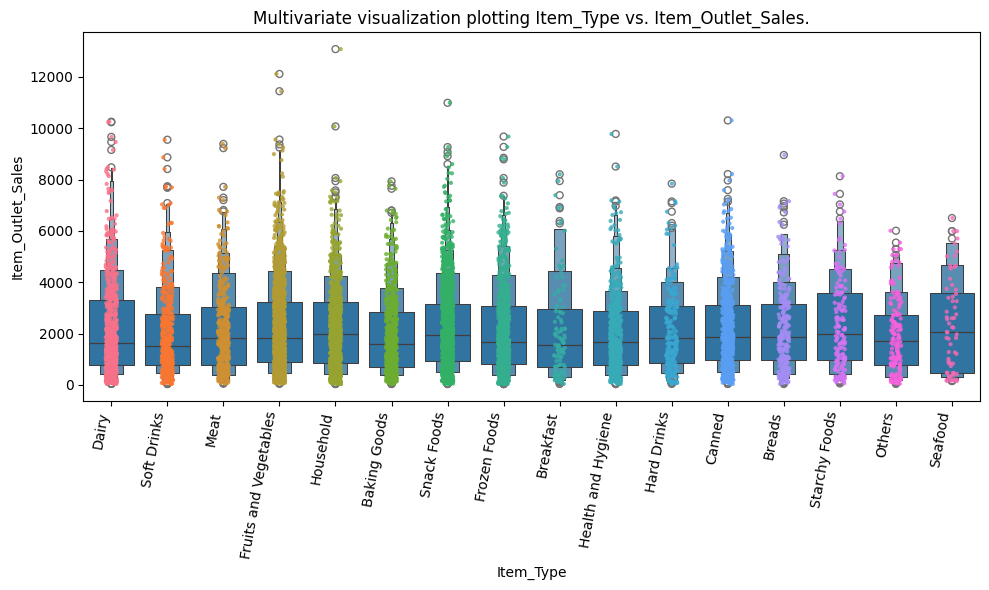

In [34]:
multi_viz(df,"Item_Type")

- Yes, I would expect the type of item to affect sales.
- Yes, this feature appears to predict sales.

###Item MRP

Maximum Retail Price (list price) of the product


####Univariate Visualisation

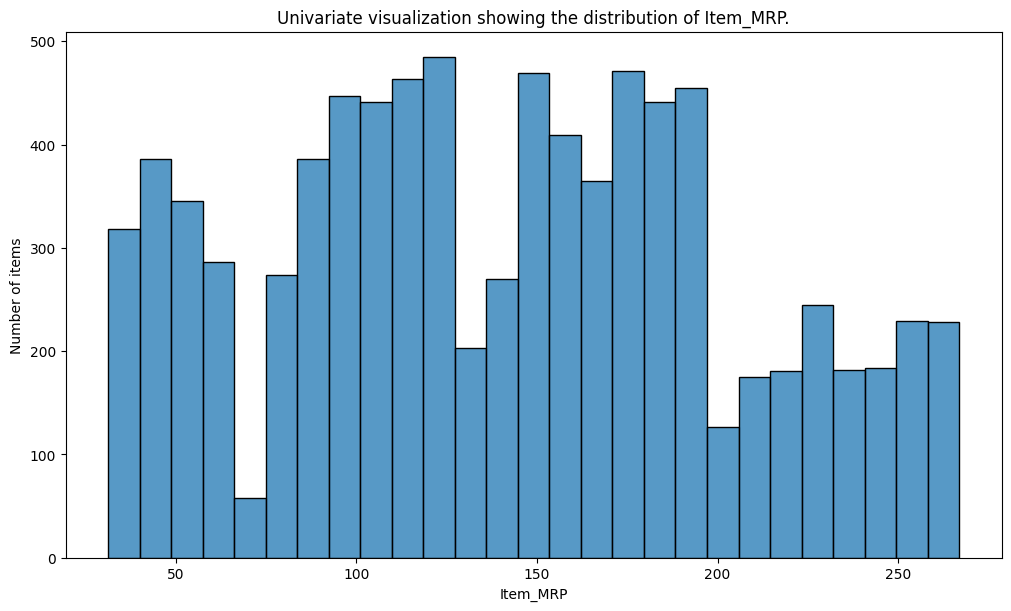

In [35]:
univ_viz(df,"Item_MRP")

Type of feature: Numerical

Null values: 0

Constant or Quasi-constant: No

Cardinality : Very High(>10)

would we know this feature: Yes

Business case Scenario : No

####Multivariate Visualisation

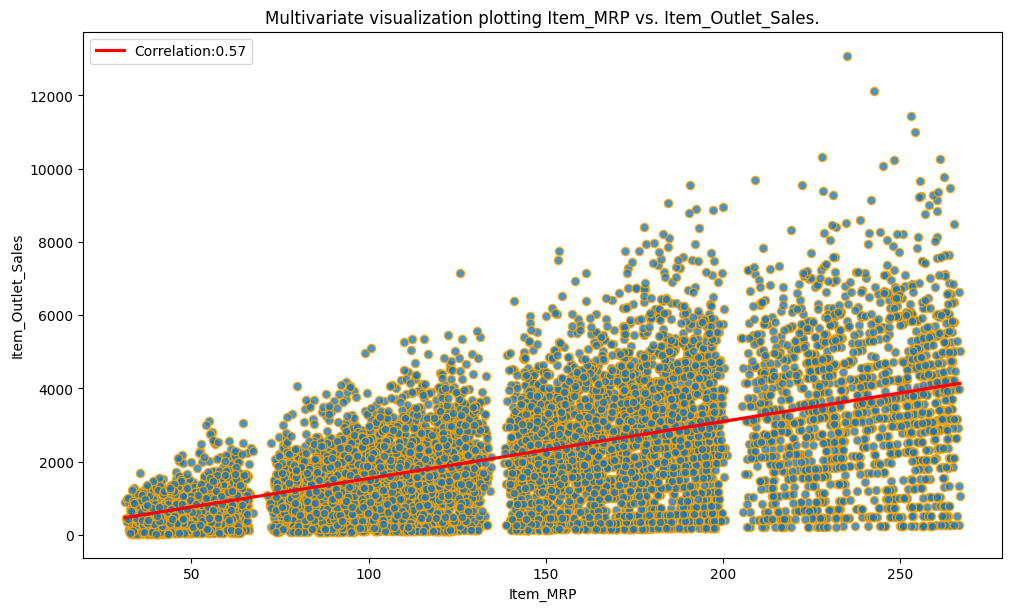

In [36]:
multi_viz(df,"Item_MRP")

- Yes, price impacts level of sales

- Yes, This feature appears to predict sales

###Outlet Identifier

Store ID


####Univariate Visualisation

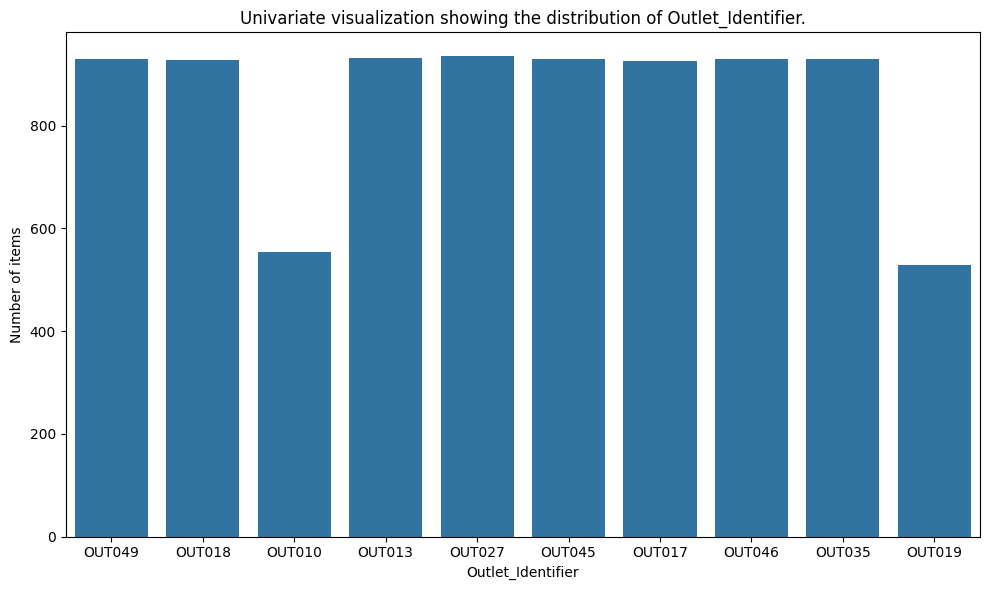

In [37]:
univ_viz(df,"Outlet_Identifier")

Type of feature: Nomonal

Null values: 0

Constant or Quasi-constant: No

Cardinality : high(10)

would we know this feature: Yes

Business case Scenario : No

####Multivariate Visualisation

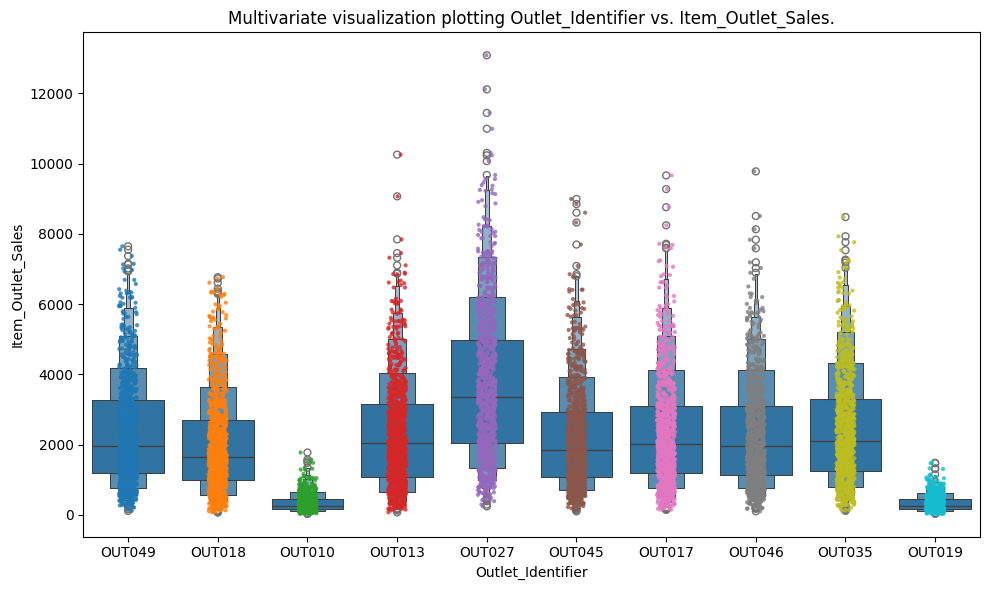

In [38]:
multi_viz(df,"Outlet_Identifier")

- Yes, naturally different stores will have different sales

- Yes, This feature impacts sales

###Outlet Establishment Year

The year in which store was established



####Univariate Visualisation

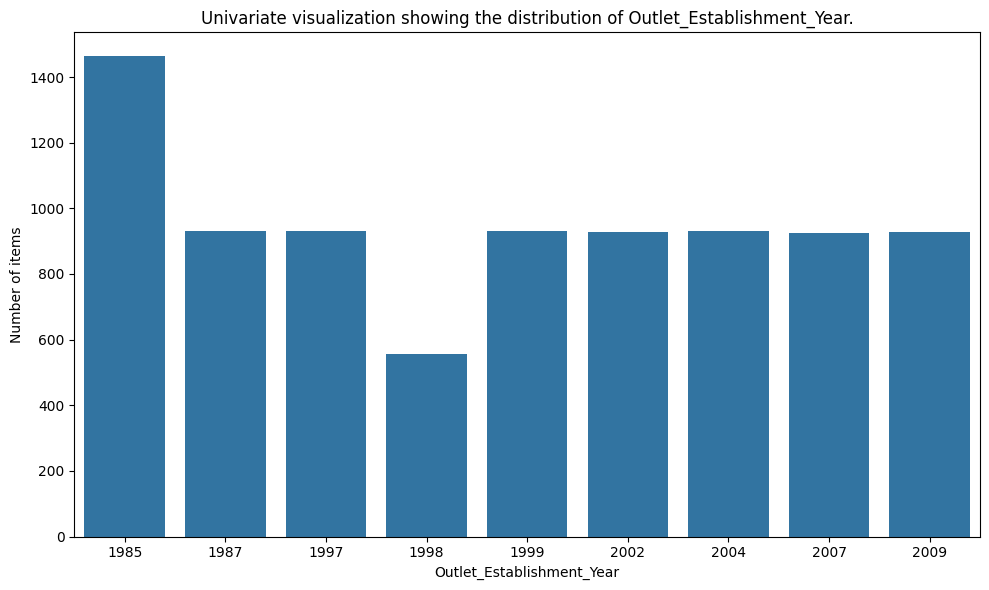

In [39]:
univ_viz(df,"Outlet_Establishment_Year")

Type of feature: Nominal

Null values: 1463

Constant or Quasi-constant: No

Cardinality : low(9)

would we know this feature: Yes

Business case Scenario : Yes, has no effect on the sales

####Multivariate Visualisation

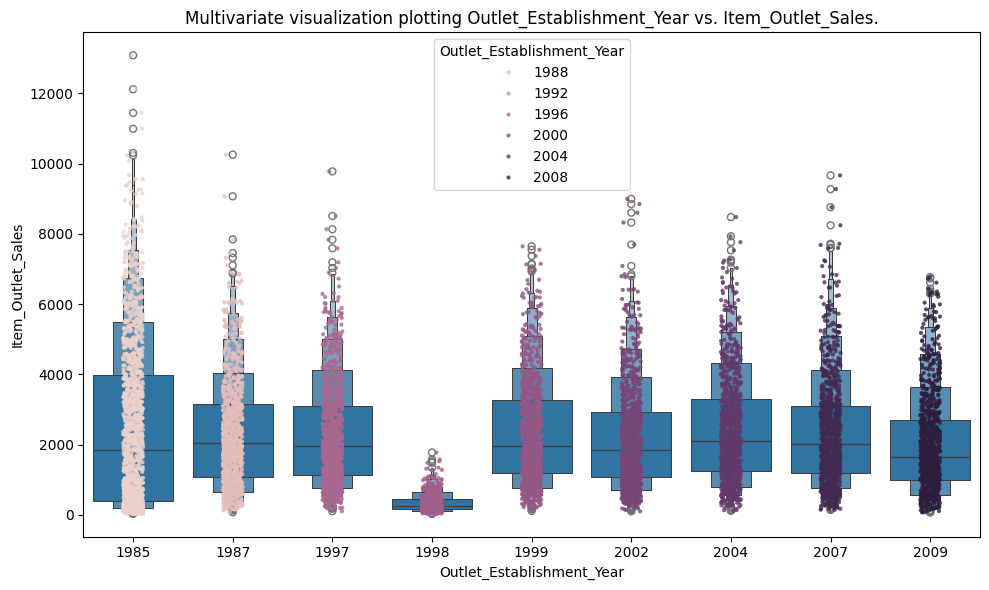

In [40]:
multi_viz(df,"Outlet_Establishment_Year")

- No, i do not expect this feature to impact sales

- Yes, this feature appears to impact sales

###Outlet Size

The size of the store in terms of ground area covered


####Univariate Visualisation

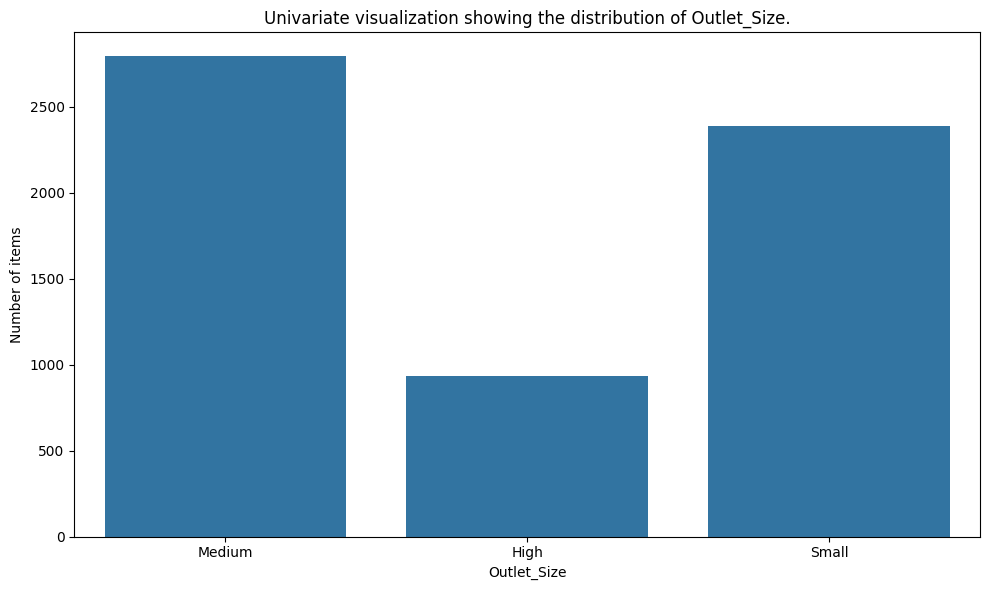

In [41]:
univ_viz(df,"Outlet_Size")


Type of feature: ordinal

Null values: 2410

Constant or Quasi-constant: No

Cardinality : low(3)

would we know this feature: Yes

Business case Scenario : No

####Multivariate Visualisation

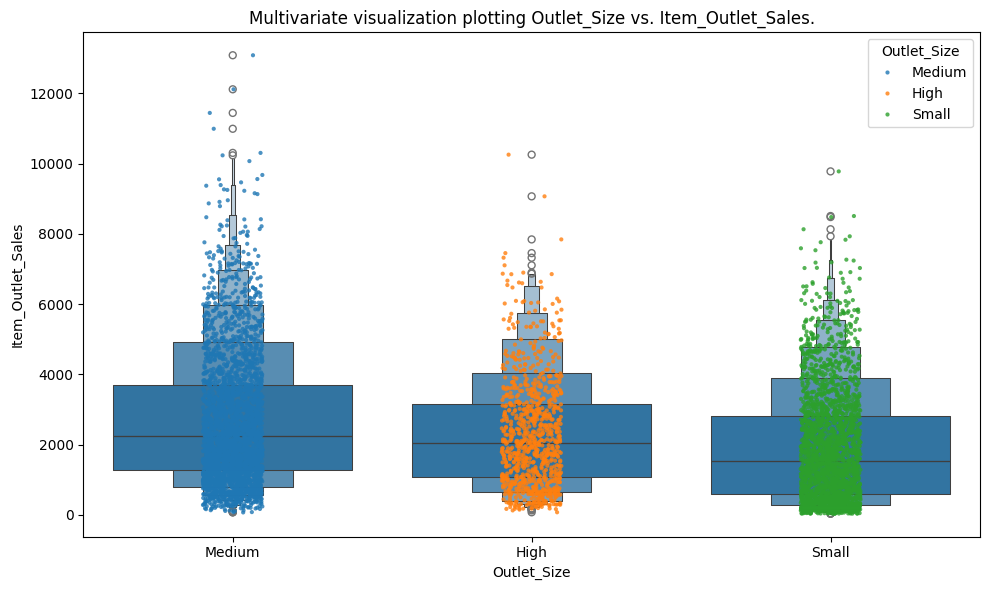

In [42]:
multi_viz(df,"Outlet_Size")

- Yes, outlet size will have impact on sales

- Yes, different sizes ave different levels of sales

###Outlet Location Type

The type of area in which the store is located


####Univariate Visualisation

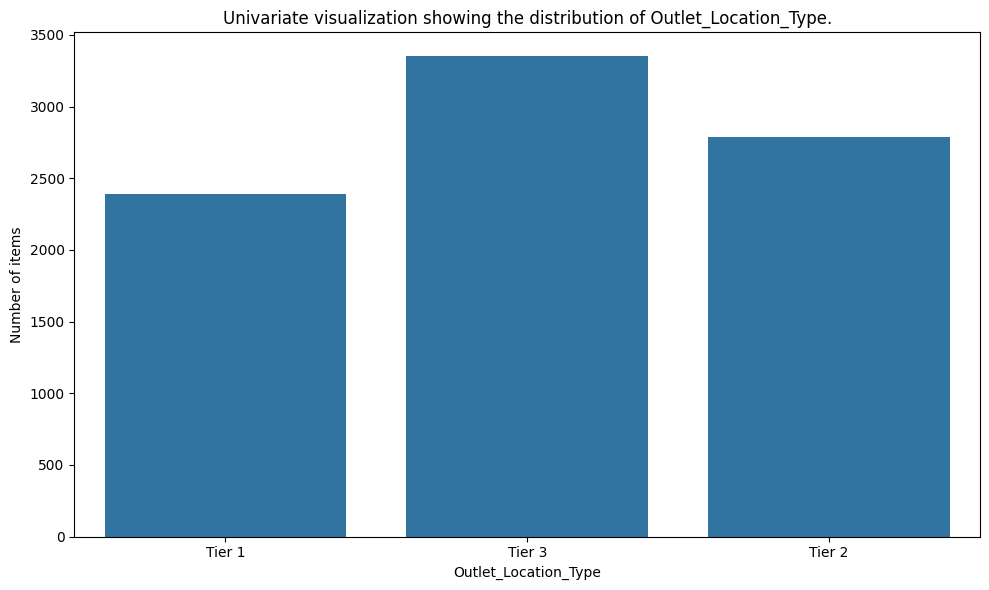

In [43]:
univ_viz(df,"Outlet_Location_Type")


Type of feature: Ordinal

Null values: 0

Constant or Quasi-constant: No

Cardinality : Low(3)

would we know this feature: Yes

Business case Scenario : No

####Multivariate Visualisation

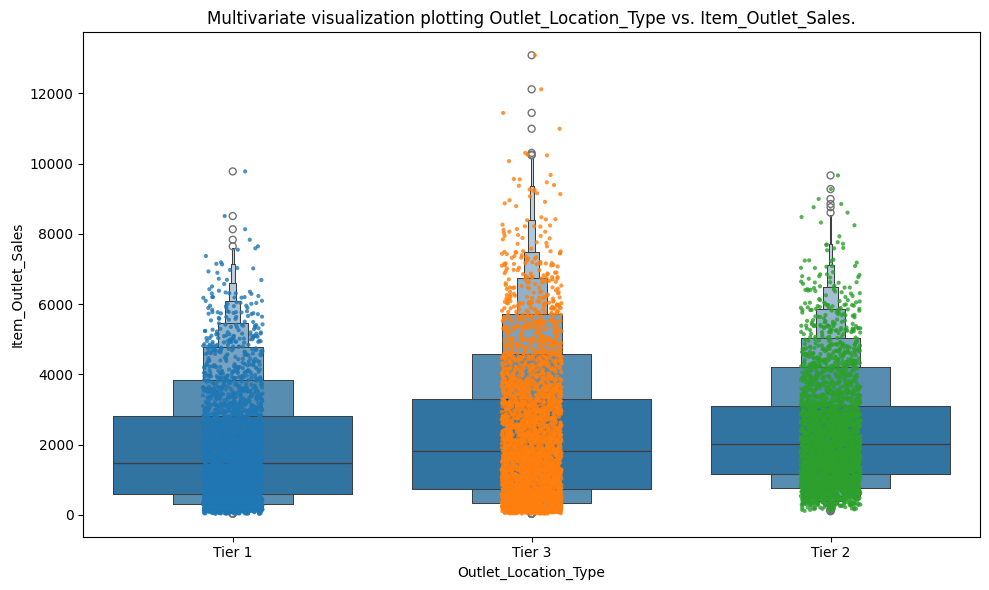

In [44]:
multi_viz(df,"Outlet_Location_Type")

- Yes, I expect it to influence sales

- Not Really, the location does not seem to have a dramatic influence on sales

###Outlet Type

Whether the outlet is a grocery store or some sort of supermarket


####Univariate Visualisation

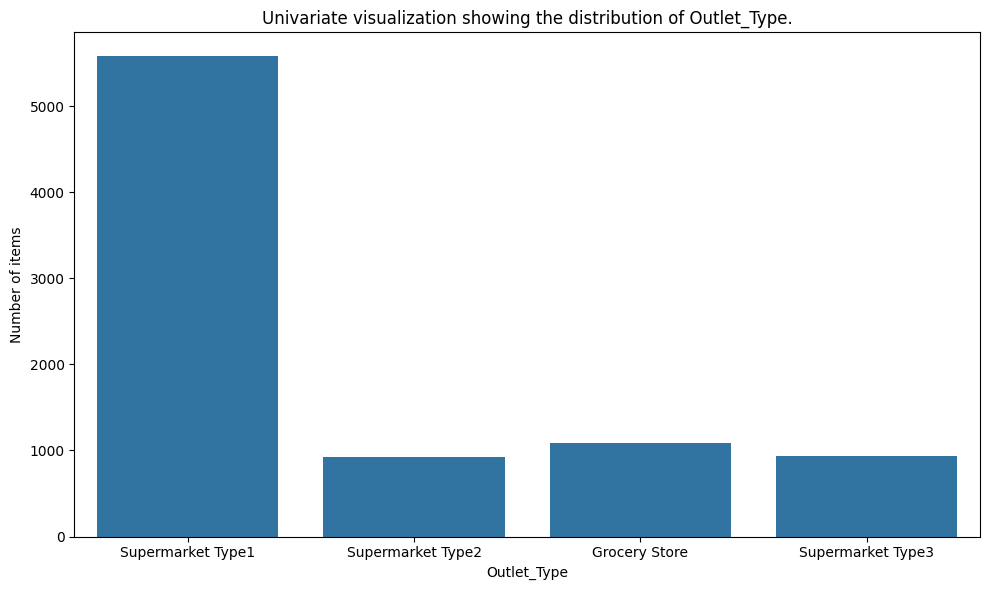

In [45]:
univ_viz(df,"Outlet_Type")

Type of feature: Nominal

Null values: 0

Constant or Quasi-constant: No

Cardinality : Low(3)

would we know this feature: Yes

Business case Scenario : No

####Multivariate Visualisation

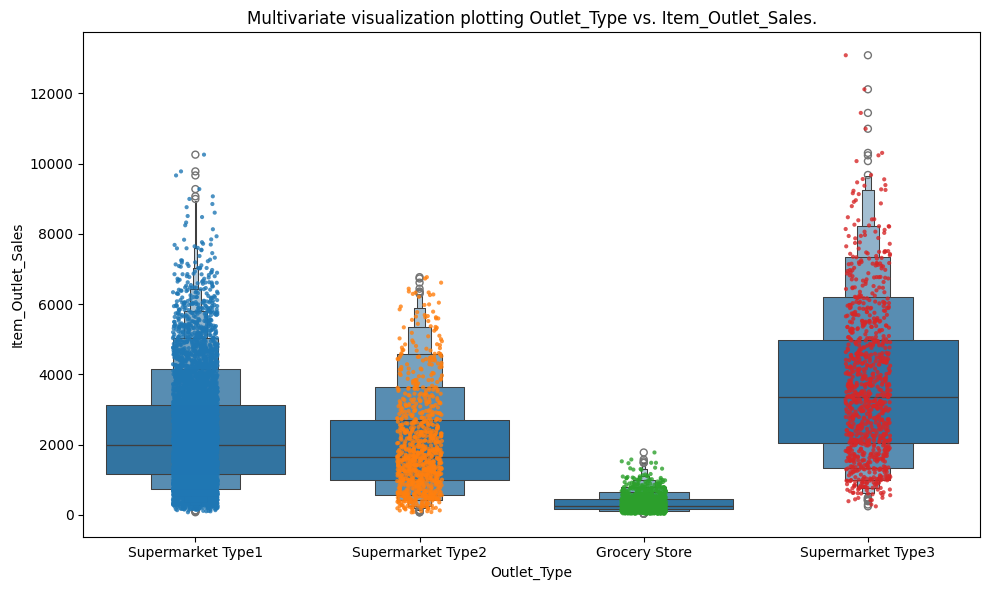

In [46]:
multi_viz(df,"Outlet_Type")

- No, i do not expect this feature to impact sales

- Yes, despite Type 3 having relatively low item count, It actually has higher sales than type 1

#Machine Learning

##INTRO

In [47]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [48]:
#loading data
df = pd.read_csv("/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv")

##basic EDA

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [50]:
#duplicates
df.duplicated().sum()

0

In [51]:
#null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [52]:
#Inconsistent labels
df.select_dtypes("object").nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [53]:
#Item_Fat_Content
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [54]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("reg","Regular")
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [55]:
print(df["Outlet_Size"].value_counts())
print("")
print(df["Outlet_Location_Type"].value_counts())
print("")
print(df["Outlet_Type"].value_counts())
print("")

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64



##Train test split

In [56]:
#features and target
X = df.drop(columns=["Item_Outlet_Sales","Item_Identifier"])
y = df["Item_Outlet_Sales"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [57]:
df["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

##pre_processing object

In [58]:
#creating lists

#orinal
ord_cols = ["Outlet_Size","Outlet_Location_Type","Item_Fat_Content"]

outletsize_order = ["NA","Small","Medium","High"]
outletloca_order = ["NA","Tier 1","Tier 2","Tier 3"]
itemfatcon_order = ["NA","Low Fat","Regular"]

ord_cols_order = [outletsize_order,outletloca_order,itemfatcon_order]

#nominal
cat_cols = ["Outlet_Type","Item_Type","Outlet_Identifier"]

#numerical
num_cols = X_train.select_dtypes("number").columns

print(len(num_cols)+len(cat_cols)+len(ord_cols))
X_train.shape

10


(6392, 10)

In [59]:
#Instantialising transformers

#Imputing
num_imputer = SimpleImputer(strategy="mean")
ord_imputer = SimpleImputer(strategy="constant",fill_value="NA")

#encoders
ord_encorder = OrdinalEncoder(categories=ord_cols_order)
ohe_encorder = OneHotEncoder(sparse_output=False,handle_unknown="ignore")

#Standardisation
scaler=StandardScaler()

In [60]:
#Instantialising Pipeline
num_pipe = make_pipeline(num_imputer,scaler)
cat_pipe = make_pipeline(ohe_encorder)
ord_pipe = make_pipeline(ord_imputer,ord_encorder,scaler)

In [61]:
#Instantialising Column Transformer

num_tuple=("Numeric",num_pipe,num_cols)
cat_tuple=("Nominal",cat_pipe,cat_cols)
ord_tuple=("Ordinal",ord_pipe,ord_cols)

col_transformer = ColumnTransformer([num_tuple,ord_tuple,cat_tuple],verbose_feature_names_out=False)

#Fitting the transformer
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('Ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEn...
                                                                             ['NA',
                                                                              'Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['NA',
                                                                              'Low '
                                                                              'Fat',
                                                                              'Regular']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type',
                                  'Item_Fat_Content']),
                                ('Nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Outlet_Type', 'Item_Type',
                                  'Outlet_Identifier'])],
                  verbose_feature_names_out=False)

In [62]:
#Transforming Train set
X_train_tf = col_transformer.transform(X_train)

#Transforming Test set
X_test_tf = col_transformer.transform(X_test)

<Axes: >

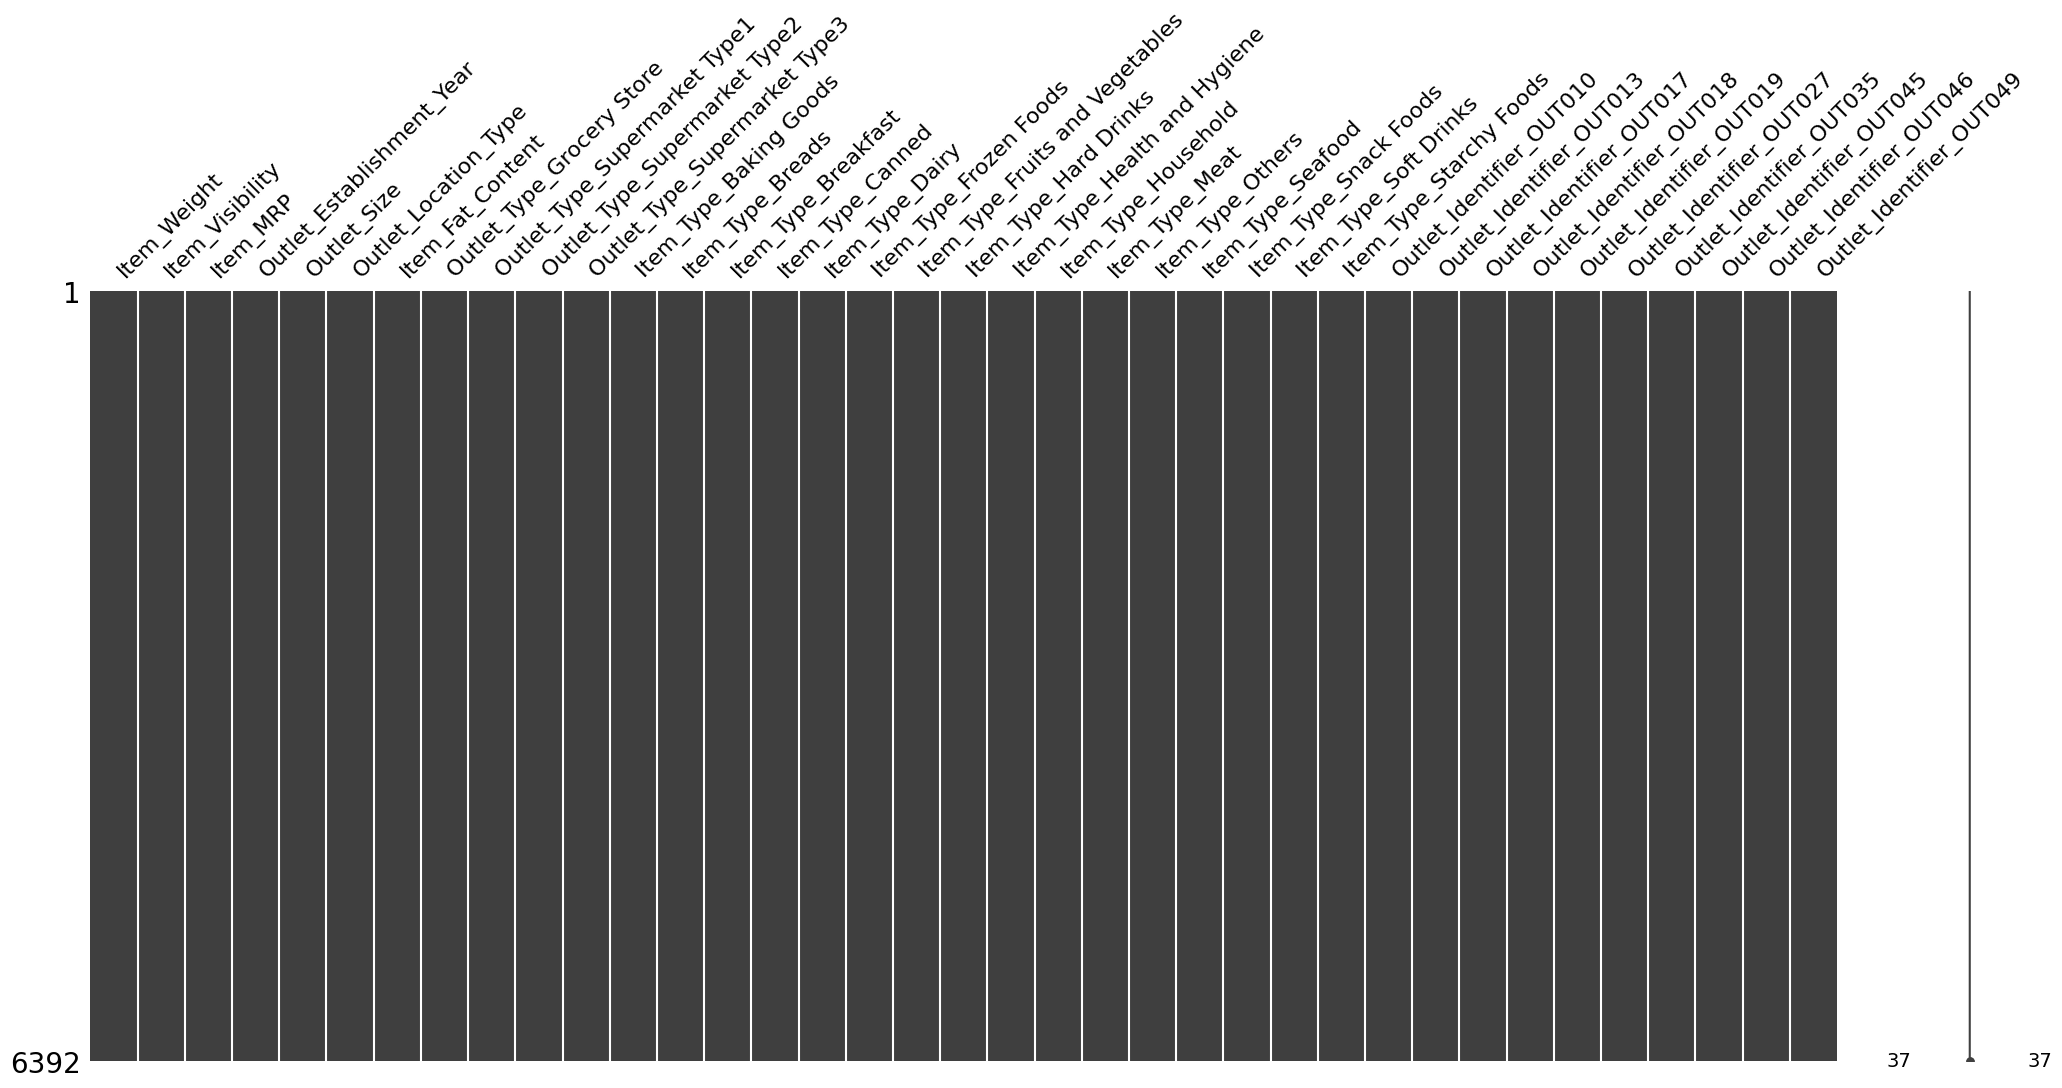

In [63]:
#checking missing values
missingno.matrix(X_train_tf)

In [65]:
#checking if transformed
X_train_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
4776,0.817249,-0.712775,1.828109,1.327849,0.748125,1.084948,-0.740321,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,0.748125,1.084948,1.350766,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,0.748125,-1.384777,1.350766,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5327,-1.169219,-1.004931,-0.952591,0.732018,-0.264370,-0.149914,-0.740321,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,-1.276865,-0.149914,-0.740321,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
